PROJECT ID - 'PRCP-1012 GAME WINNER PREDICTION'

# PROBLEM STATEMENT
TASK 1 -Prepare a complete data analysis report on the given data.

TASK 2 - Create predictive model which is at an attempt to predict the win probabilityof the pubg game.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
data=pd.read_csv('/content/pubg.csv')

In [ ]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303981,1235d12a384a1b,5f3af3cb802259,81ee386bf4767c,0.0,1.0,0.00,0.0,0.0,0.0,56.0,...,0.0,868.1000,0.0,0.00,0.0,0.0,566.00,5.0,0.0,0.5102
303982,d53398e9bcddfe,bbc5d546701948,dbdfbc06fa7940,0.0,0.0,45.15,0.0,0.0,0.0,57.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,822.70,5.0,0.0,0.4792
303983,038c6bba825714,571cbdddc88056,7560a7375e2102,0.0,0.0,124.50,1.0,0.0,0.0,85.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,62.64,1.0,1516.0,0.1600
303984,160369b0d1738e,78bdcac1aae351,a7db21d89c682a,0.0,3.0,56.33,0.0,0.0,0.0,50.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,2725.00,5.0,0.0,0.5714


In [ ]:
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [ ]:
data.tail()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
303981,1235d12a384a1b,5f3af3cb802259,81ee386bf4767c,0.0,1.0,0.00,0.0,0.0,0.0,56.0,...,0.0,868.1,0.0,0.0,0.0,0.0,566.00,5.0,0.0,0.5102
303982,d53398e9bcddfe,bbc5d546701948,dbdfbc06fa7940,0.0,0.0,45.15,0.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,822.70,5.0,0.0,0.4792
303983,038c6bba825714,571cbdddc88056,7560a7375e2102,0.0,0.0,124.50,1.0,0.0,0.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,62.64,1.0,1516.0,0.1600
303984,160369b0d1738e,78bdcac1aae351,a7db21d89c682a,0.0,3.0,56.33,0.0,0.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2725.00,5.0,0.0,0.5714
303985,11926a1eade7d9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134323 entries, 0 to 134322
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               134323 non-null  object 
 1   groupId          134323 non-null  object 
 2   matchId          134323 non-null  object 
 3   assists          134323 non-null  int64  
 4   boosts           134323 non-null  int64  
 5   damageDealt      134323 non-null  float64
 6   DBNOs            134323 non-null  int64  
 7   headshotKills    134323 non-null  int64  
 8   heals            134323 non-null  int64  
 9   killPlace        134323 non-null  int64  
 10  killPoints       134323 non-null  int64  
 11  kills            134323 non-null  int64  
 12  killStreaks      134323 non-null  int64  
 13  longestKill      134322 non-null  float64
 14  matchDuration    134322 non-null  float64
 15  matchType        134322 non-null  object 
 16  maxPlace         134322 non-null  floa

Data Descritption

DBNOs - Number of enemy players knocked.
* assists - Number of enemy players this player damaged that were killed by teammates.
* boosts - Number of boost items used.
* damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
* headshotKills - Number of enemy players killed with headshots.
* heals - Number of healing items used.
* Id - Player’s Id.
* killPlace - Ranking in match of number of enemy players killed.
* killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* kills - Number of enemy players killed.
* longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* matchId - ID to identify match. There are no matches that are in both the training and testing set.
* revives - Number of times this player revived teammates.
* rideDistance - Total distance traveled in vehicles measured in meters.
* roadKills - Number of kills while in a vehicle.
* swimDistance - Total distance traveled by swimming measured in meters.
* teamKills - Number of times this player killed a teammate.
* vehicleDestroys - Number of vehicles destroyed.




In [ ]:
data.shape

(134323, 29)

In [ ]:
# check row with null value win place perc
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
134322,988e17b80db156,bde100153f0b80,975c29d0816674,0,4,75.0,1,0,4,49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove that row
data.drop(134322, inplace = True)

Understanding the Player distribution

In [ ]:
data['playerjoined']=data.groupby('matchId')['matchId'].transform('count')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444,5
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400,5
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755,3
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667,6
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875,5


Analysing the data

Kill Without Moving

In [ ]:
# prepare a data parameter to gather the information of the total distance travelled
data['totaldistance']=data['walkDistance'] + data['rideDistance'] + data['swimDistance']

# prepare a data parameter to check for anamoly detection that
# the person has not moved but still managed to do the kills
data['killwithoutmoving']=((data['kills']>0) & (data['totaldistance']==0))

players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows!!¶

In [ ]:
data[data['killwithoutmoving']==True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playerjoined,totaldistance,killwithoutmoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0.0,0.0,0.0,8.0,0.0,0.8571,5,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0.0,0.0,0.0,22.0,0.0,0.6000,3,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0.0,0.0,0.0,13.0,0.0,0.8947,1,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0.0,0.0,0.0,7.0,1500.0,0.0000,1,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0.0,0.0,0.0,10.0,0.0,0.3000,3,0.0,True


In [ ]:
data[data['killwithoutmoving']==True].shape

(114, 31)

In [ ]:
# drop the table
data.drop(data[data['killwithoutmoving'] == True].index , inplace = True)

Extra Ordinary Road Kills

In [ ]:
data[data['roadKills']>=5].shape

(4, 32)

In [ ]:
data.drop(data[data['roadKills']>=5].index , inplace= True)

So many kills -How?

In a match a player cannot not kill more that 10 kill

In [ ]:
# data dimension
data[data['kills'] > 10].shape

(240, 32)

In [ ]:
# drop the instances
data.drop(data[data['kills'] > 10].index, inplace = True)

Head shot

In [ ]:
data['headshot_rate'] = data['headshotKills']/data['kills']
data['headshot_rate'] = data['headshot_rate'].fillna(0)

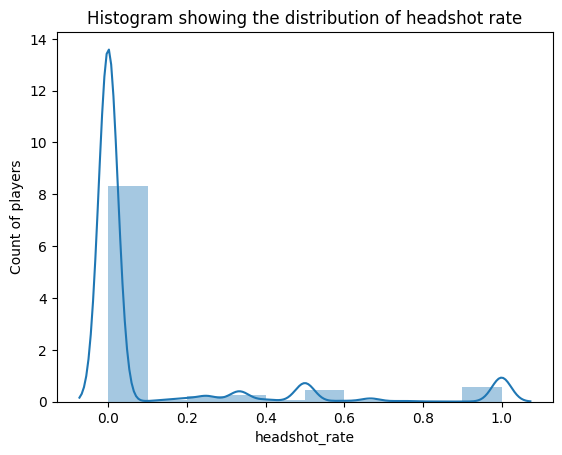

In [ ]:
# plot the headshot rate distribution
sns.distplot(data['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [ ]:
data[(data['headshot_rate'] ==1) & (data['kills']>5)].shape

(5, 33)

In [ ]:
data.drop(data[(data['headshot_rate'] == 1)& (data['kills'] > 6)].index, inplace = True)

Longest Shot

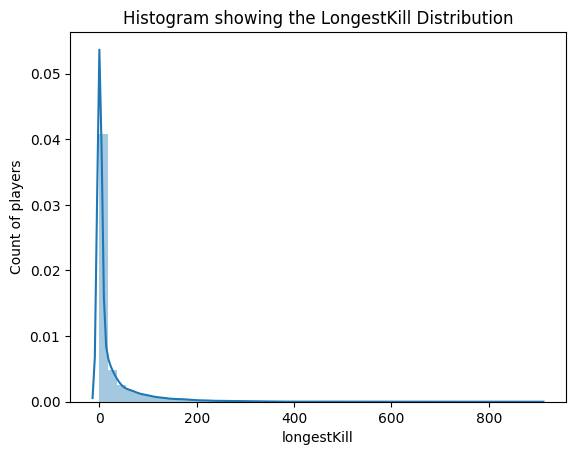

In [ ]:
sns.distplot(data['longestKill'], bins = 50).set_title("Histogram showing the LongestKill Distribution")
plt.ylabel("Count of players")
plt.show()

if a player can kill more than 500m distance it seem suspisious player so we remove those player

In [ ]:
data[data['longestKill']>=500].shape

(24, 33)

In [ ]:
data.drop(data[data['longestKill']>=500].index, inplace = True)

Weapon Change

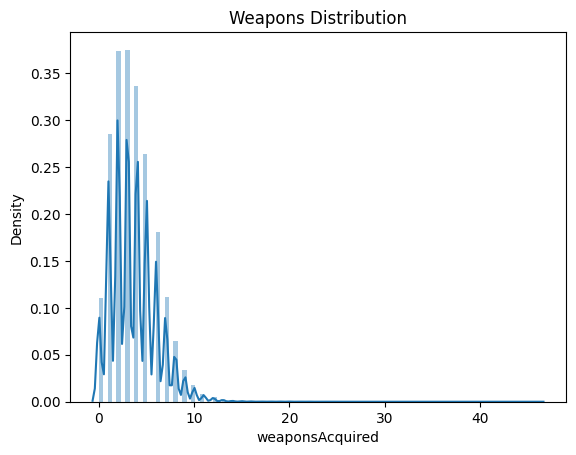

In [ ]:
sns.distplot(data['weaponsAcquired'], bins=100).set_title("Weapons Distribution")
plt.show()

In [ ]:
data[data['weaponsAcquired']>=15].shape

(154, 33)

correlation of parameter with Win Prediction

In [ ]:
#OUTLITERS

In [ ]:
for i in ['Id','groupId','matchId']:
 print(f'unique {i} count:',data[i].nunique())

unique Id count: 295119
unique groupId count: 274501
unique matchId count: 47569


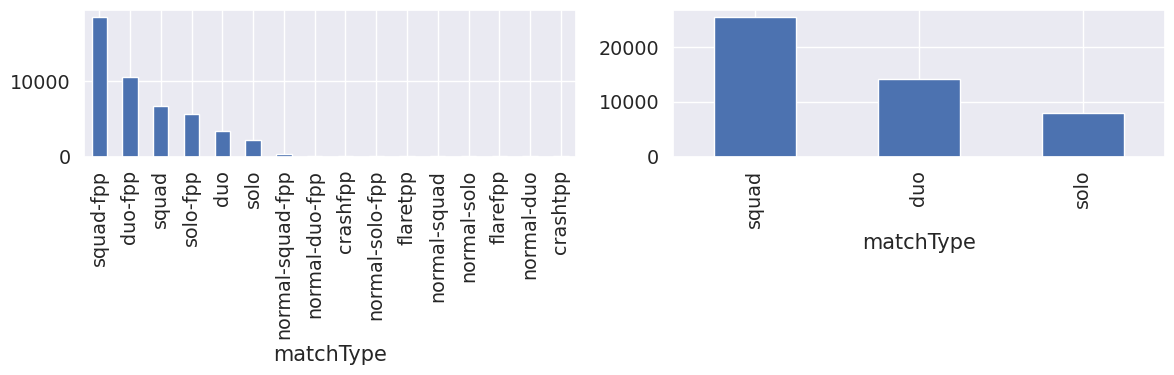

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot original matchType distribution
data.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

# Define the mapper function with a check for non-string values
mapper = lambda x: 'solo' if isinstance(x, str) and 'solo' in x else 'duo' if isinstance(x, str) and ('duo' in x or 'crash' in x) else 'squad'

# Apply the mapper function to the 'matchType' column
data['matchType'] = data['matchType'].apply(mapper)

# Plot modified matchType distribution
data.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

plt.tight_layout()
plt.show()


In [ ]:
###player Analysis

In [ ]:
### players in match and group during a game, 100 players join the same server .so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.

In [ ]:
import itertools
import pandas as pd

# Corrected function to merge two lists using itertools.product
def mergeList(list1, list2):
    return list(itertools.product(list1, list2))

# Grouping the data
match = data.groupby(['matchType', 'matchId']).size().to_frame('players in match')
group = data.groupby(['matchType', 'matchId', 'groupId']).size().to_frame('players in group')

# Concatenating the results
pd.concat([
    match.groupby('matchType').describe()[mergeList(['players in match'], ['min', 'mean', 'max'])],
    group.groupby('matchType').describe()[mergeList(['players in group'], ['min', 'mean', 'max'])]
], axis=1)


players in match                 players in group               
                       min      mean   max              min      mean  max
matchType                                                                 
duo                    1.0  6.177822  17.0              1.0  1.041699  4.0
solo                   1.0  6.075010  17.0              1.0  1.006328  7.0
squad                  1.0  6.258330  18.0              1.0  1.117587  6.0

In [ ]:
print(group['players in group'].nlargest(5))

matchType  matchId         groupId       
squad      b30f3d87189aa6  14d6b54cdec6bc    74
duo        3e029737889ce9  b8275198faa03b    72
solo       41a634f62f86b7  128b07271aa012    64
duo        7e93ce71ac6f61  7385e5fe214021    49
squad      3c2531adf5b942  e52a2e6ca30474    36
Name: players in group, dtype: int64


In [ ]:
subset = data[data['matchId'] == 'b30f3d87189aa6']
sub_grp = subset[subset['groupId']=='14d6b54cdec6bc']

print('matchId == \'b30f3d87189aa6\' & groupId == \'14d6b54cdec6bc\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('maxGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())




matchId == 'b30f3d87189aa6' & groupId == '14d6b54cdec6bc'
--------------------------------------------------
players: 5
groups: 1
maxGroups: [2]
maxPlace: [2]
--------------------------------------------------
max-group players: 5
max-group winPlacePerc: [0.]
--------------------------------------------------
winPlacePerc: [0.]


In [ ]:
subset = data[data['matchId'] == 'b30f3d87189aa6']
sub_grp = subset[subset['groupId']=='14d6b54cdec6bc']

print('matchId == \'b30f3d87189aa6\' & groupId == \'14d6b54cdec6bc\'')
print('-'*25)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('maxGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*25)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*25)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())


matchId == 'b30f3d87189aa6' & groupId == '14d6b54cdec6bc'
-------------------------
players: 5
groups: 1
maxGroups: [2]
maxPlace: [2]
-------------------------
max-group players: 5
max-group winPlacePerc: [0.]
-------------------------
winPlacePerc: [0.]


In [ ]:
subset = data[data['matchId'] == 'f0c0fd40ab4e80']
sub_grp = subset[subset['groupId']=='566ed94d7d1fd2']

print('matchId == \'f0c0fd40ab4e80\' & groupId == \'566ed94d7d1fd2\'')
print('-'*50)
print('players:',len(subset))
print('groups:',subset['groupId'].nunique())
print('maxGroups:',subset['numGroups'].unique())
print('maxPlace:',subset['maxPlace'].unique())
print('-'*50)
print('max-group players:',len(sub_grp))
print('max-group winPlacePerc:',sub_grp['winPlacePerc'].unique())
print('-'*50)
print('winPlacePerc:',subset['winPlacePerc'].sort_values().unique())




matchId == 'f0c0fd40ab4e80' & groupId == '566ed94d7d1fd2'
--------------------------------------------------
players: 1
groups: 1
maxGroups: [19.]
maxPlace: [25.]
--------------------------------------------------
max-group players: 1
max-group winPlacePerc: [0.0417]
--------------------------------------------------
winPlacePerc: [0.0417]


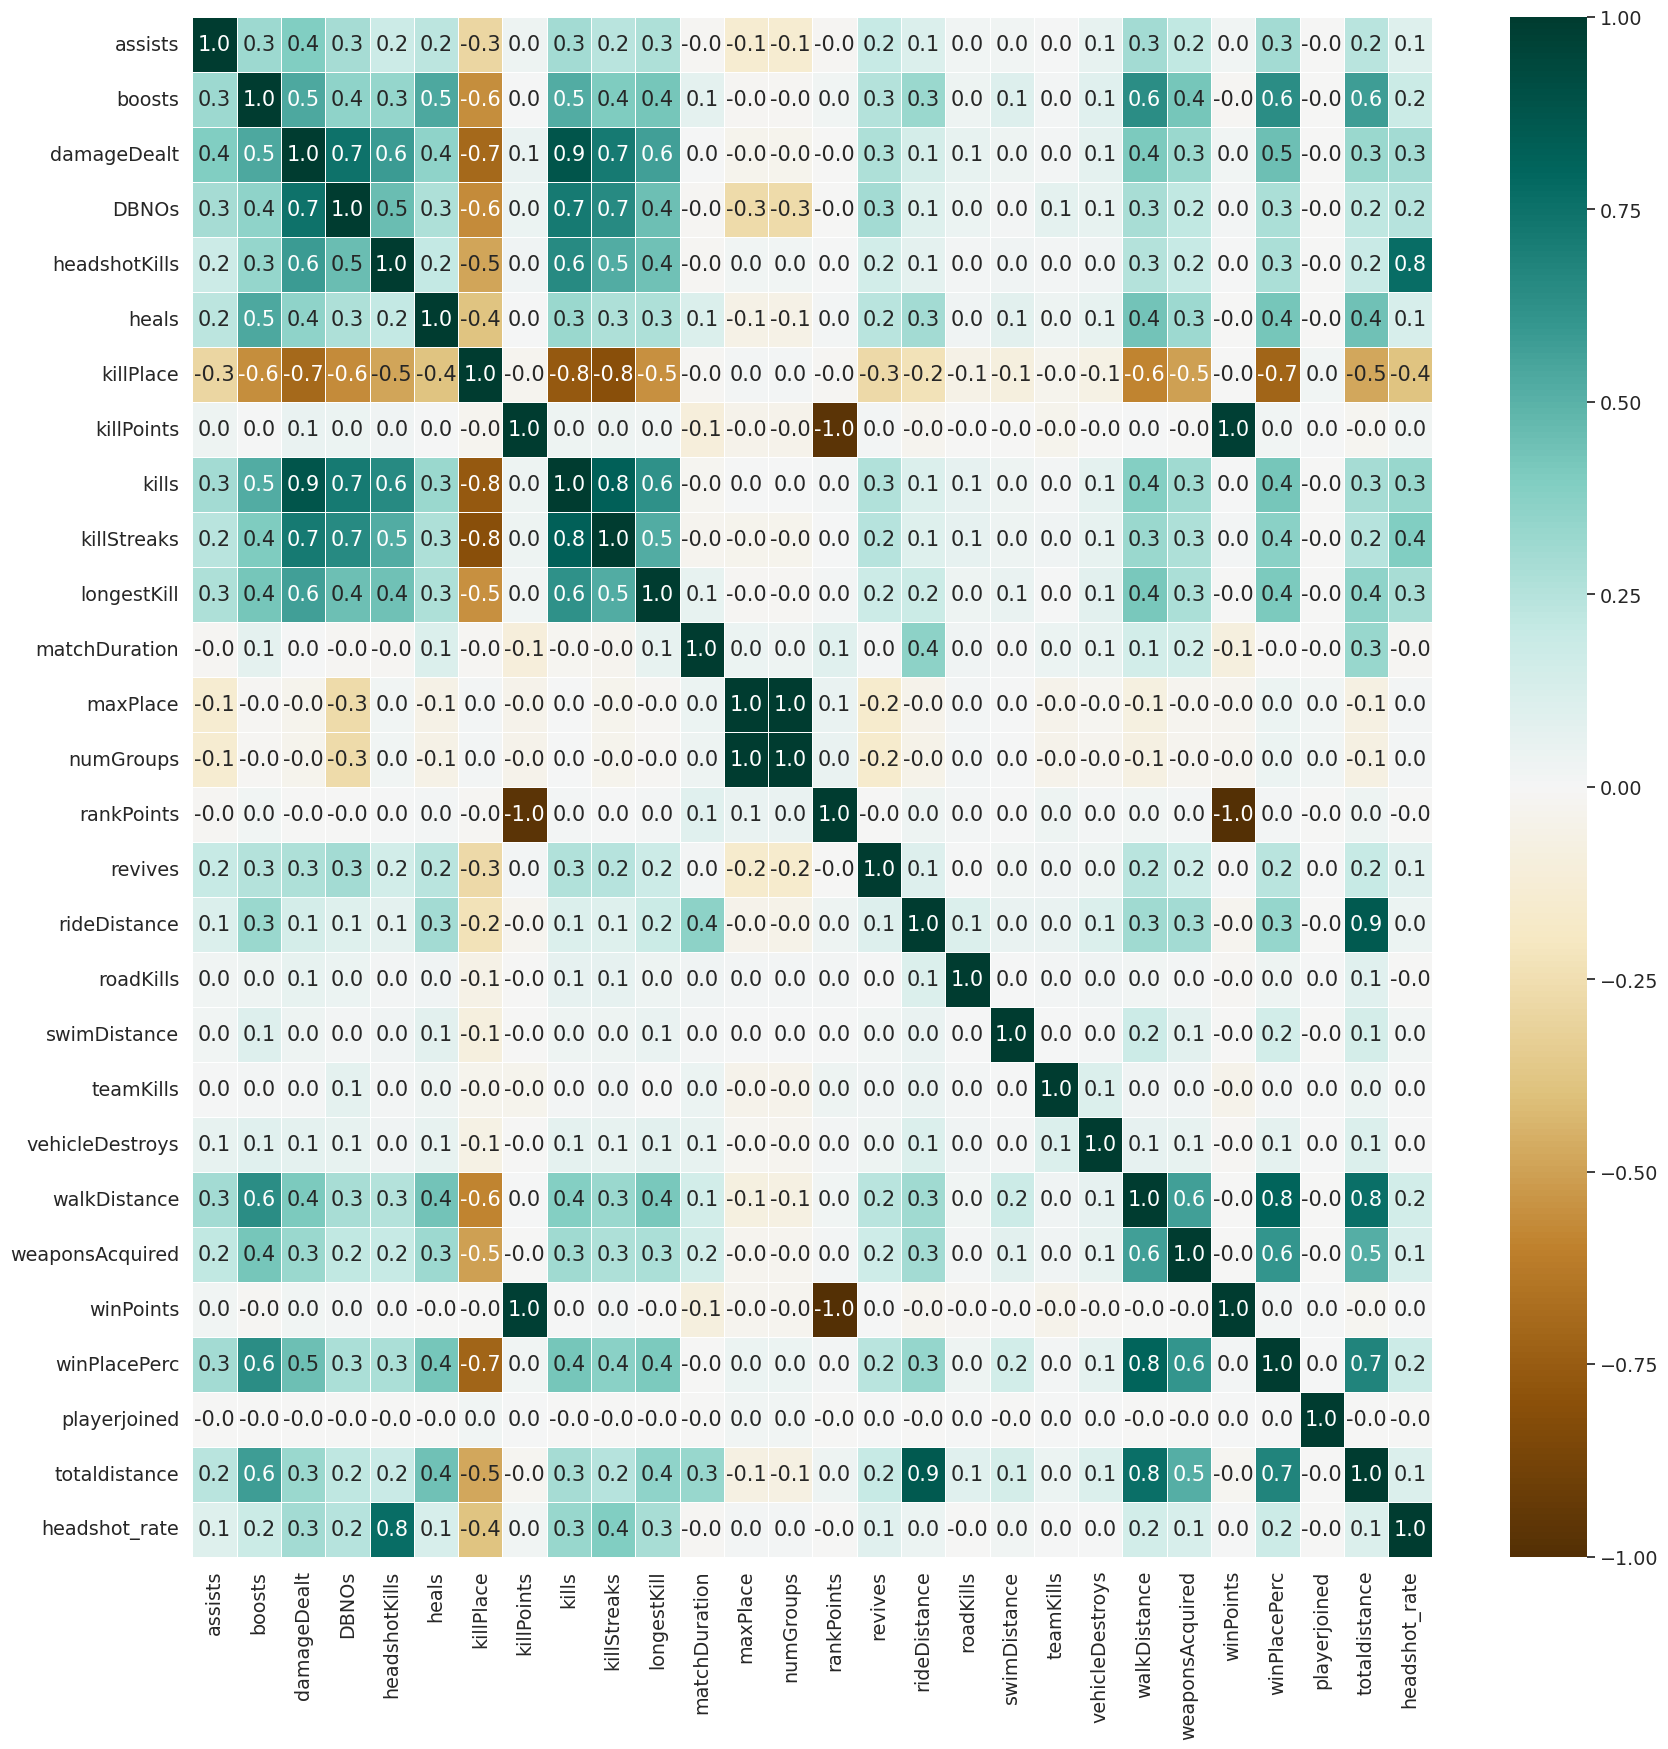

In [ ]:
numerical_data = data.select_dtypes(include=['float', 'int'])
corr = numerical_data.corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
sns.heatmap(corr, annot=True, fmt = '.1f', cmap="BrBG", vmin=-1, vmax=1, center=0,linewidths=0.5)
plt.show()


In [ ]:
normalising_factor = (100 - data['playerjoined']/100)+1

In [ ]:
data['killsNorm'] = data['kills'] * normalising_factor
data['damageDealtNorm'] = data['damageDealt'] * normalising_factor
data['maxPlaceNorm'] = data['maxPlace'] * normalising_factor
data['matchDurationNorm'] = data['matchDuration'] * normalising_factor


data['traveldistance'] = data['walkDistance'] + data['swimDistance'] + data['rideDistance']
data['healsnboosts'] = data['heals'] + data['boosts']
data['assist'] = data['assists'] + data['revives']

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'playerjoined',
       'totaldistance', 'killwithoutmoving', 'headshot_rate', 'killsNorm',
       'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'traveldistance', 'healsnboosts', 'assist'],
      dtype='object')

In [ ]:
data = data.drop(columns = ['Id', 'groupId', 'matchId', 'assists', 'boosts', 'walkDistance', 'swimDistance',
                          'rideDistance', 'heals', 'revives', 'kills', 'damageDealt', 'maxPlace', 'matchDuration'])

In [ ]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totaldistance,killwithoutmoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,traveldistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26.0,-1.0,0.0,...,244.8000,False,0.0,0.00,0.0000,2826.60,131840.70,244.8000,0,0.0
1,0,0,57,0,0,0.00,squad-fpp,25.0,1484.0,0.0,...,1445.0445,False,0.0,0.00,9233.8965,2624.70,179388.15,1445.0445,0,0.0
2,0,0,47,0,0,0.00,duo,47.0,1491.0,0.0,...,161.8000,False,0.0,0.00,6865.9600,5048.50,133078.46,161.8000,0,1.0
3,0,0,75,0,0,0.00,squad-fpp,30.0,1408.0,0.0,...,202.7000,False,0.0,0.00,3320.9260,3129.14,144949.84,202.7000,0,0.0
4,0,0,45,0,1,58.53,solo-fpp,95.0,1560.0,0.0,...,49.7500,False,0.0,100.95,10095.0000,9792.15,143752.80,49.7500,0,0.0


Handeling Catogorical Data

In [ ]:
data=pd.get_dummies(data, columns = ['matchType', 'killwithoutmoving'])

In [ ]:
data.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killwithoutmoving_False
0,0,0,60,1241,0,0.00,26.0,-1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
1,0,0,57,0,0,0.00,25.0,1484.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
2,0,0,47,0,0,0.00,47.0,1491.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0,0,75,0,0,0.00,30.0,1408.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
4,0,0,45,0,1,58.53,95.0,1560.0,0.0,0.0,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [ ]:
features = x.columns

Scaling the Data

spliting the data

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print("On an average a person kills {:.4f} players, 99% of people have {} kills or less, while the maximum kills ever recorded is {}.".format(data['kills'].mean(), data['kills'].quantile(0.99), data['kills'].max()))


On an average a person kills 0.9225 players, 99% of people have 7.0 kills or less, while the maximum kills ever recorded is 24.


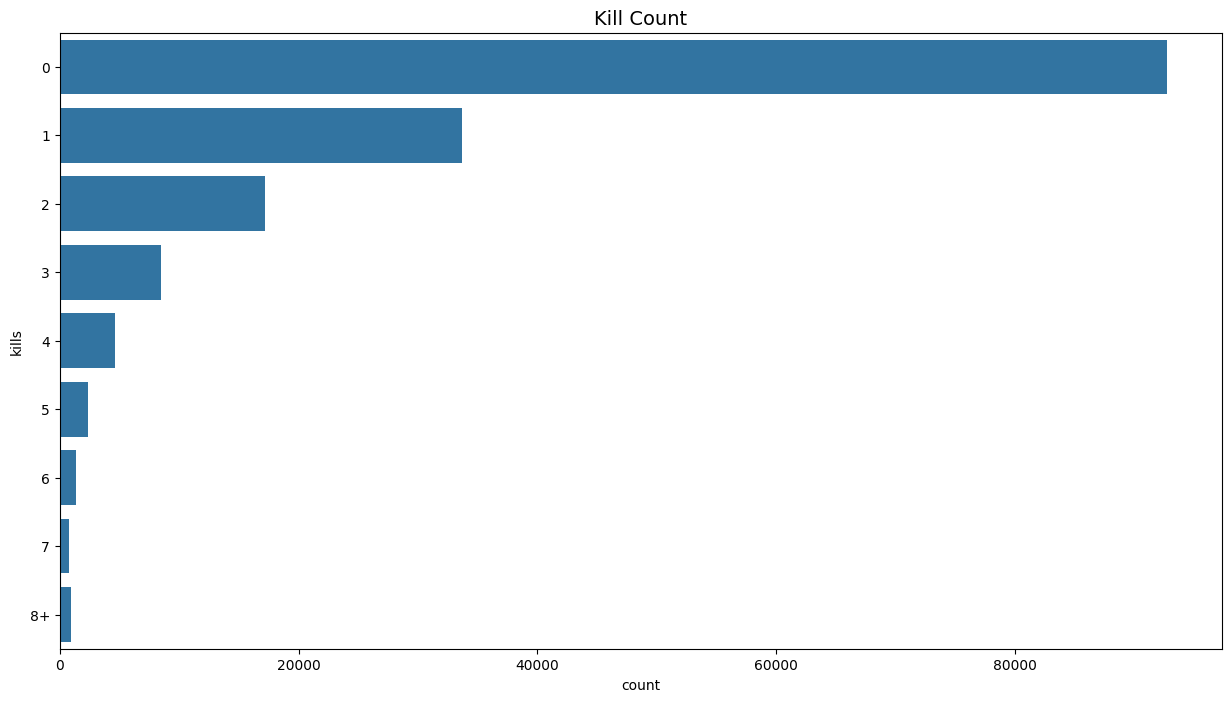

In [ ]:
data = data.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,8))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=14)
plt.show()

<ipython-input-24-47469d6ecd46>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['damageDealt'])


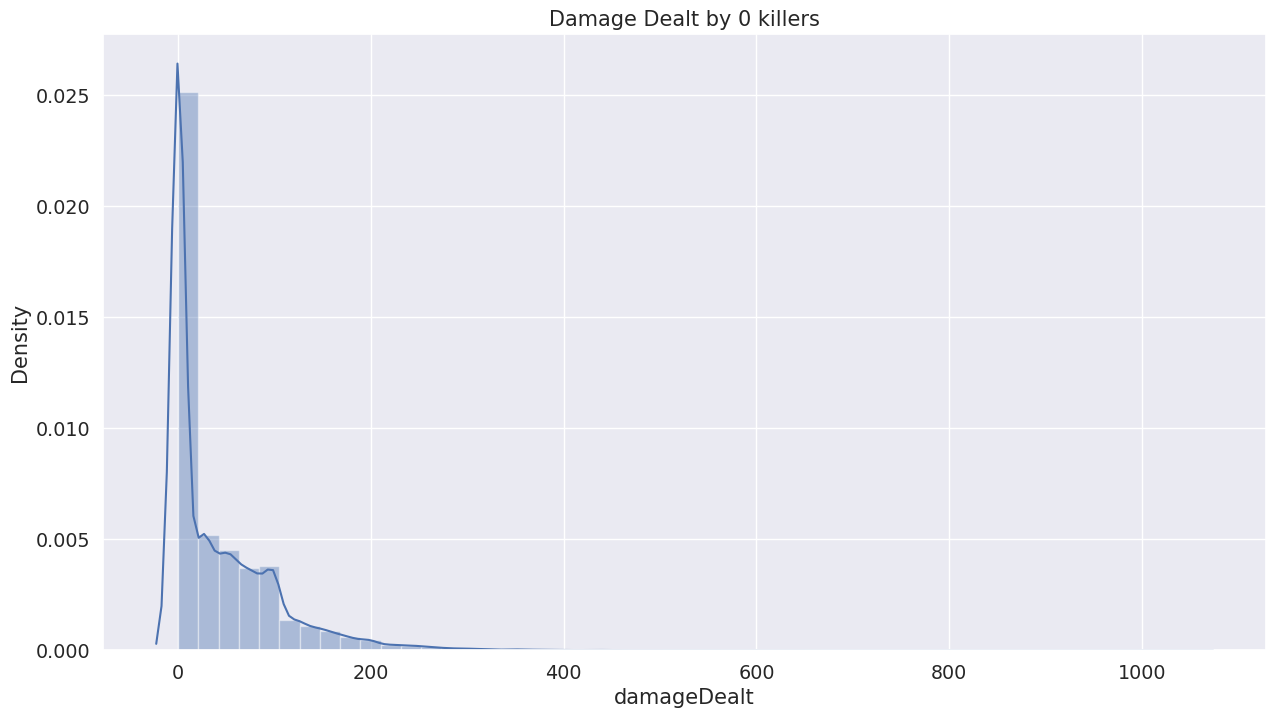

In [ ]:
data = data.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,8))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()


In [ ]:
print("A total of {} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]),100*len(data[data['winPlacePerc']==1])/len(data)))
data1 = data[data['damageDealt'] == 0].copy()
print("A total of {} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]),100*len(data1[data1['winPlacePerc']==1])/len(data1)))

A total of 203 players (0.7202%) have won without a single kill!
A total of 57 players (0.4146%) have won without dealing damage!


EFFECT OF KILLING ON WINNING PERCENTAGE.

as shown below by the increasing mean of win percentage placement , we found that kill count was correlated with our target variable, which make sense because more kills usually means a players is better skilled and will rank closer to the top.

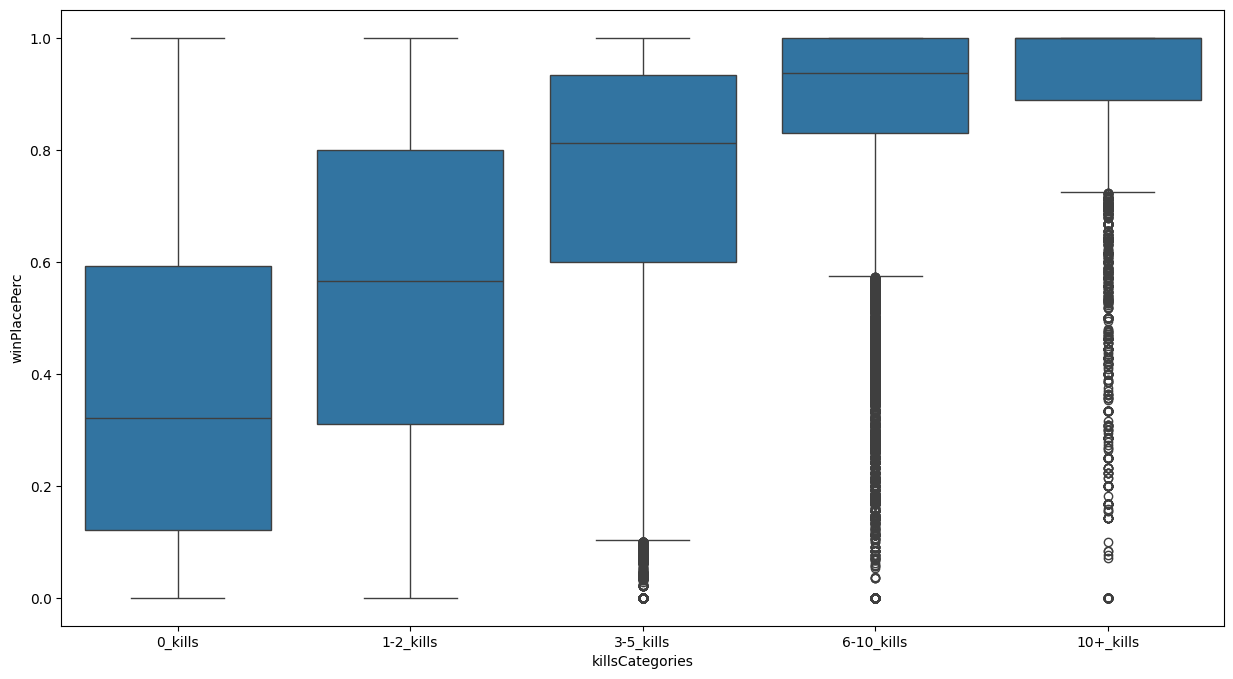

In [ ]:
kills = data.copy()
kills['killsCategories'] = pd.cut(kills['kills'],[-1,0,2,5,10,60],labels=['0_kills','1-2_kills','3-5_kills','6-10_kills','10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc",data=kills)
plt.show()

In [ ]:
print("{} players ({:.4f}m) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard")

{} players ({:.4f}m) walked 0 meters. This means that either they die before even taking a step or they have just joined the game but are away from keyboard


<ipython-input-28-e1acb882b032>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['walkDistance'])


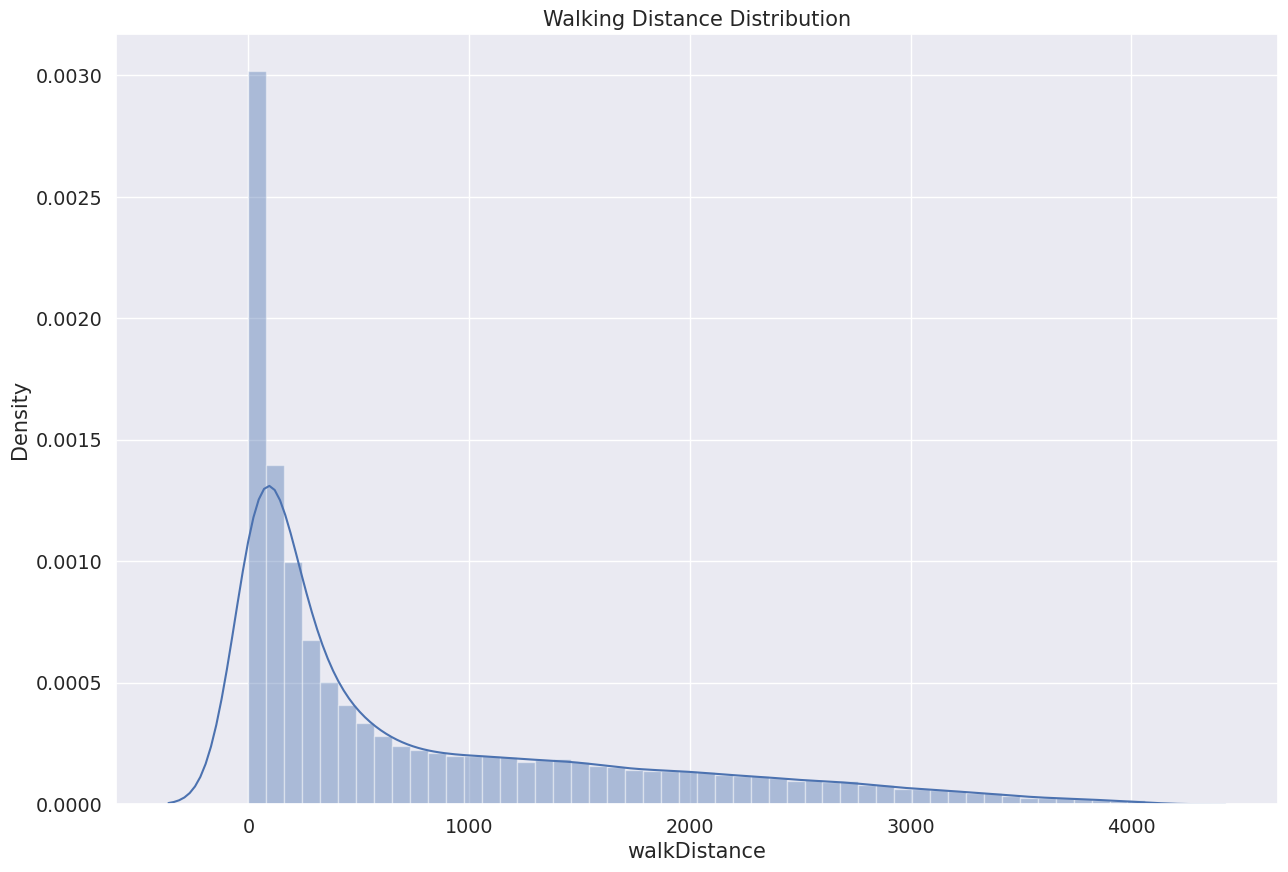

In [ ]:
data = data.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()


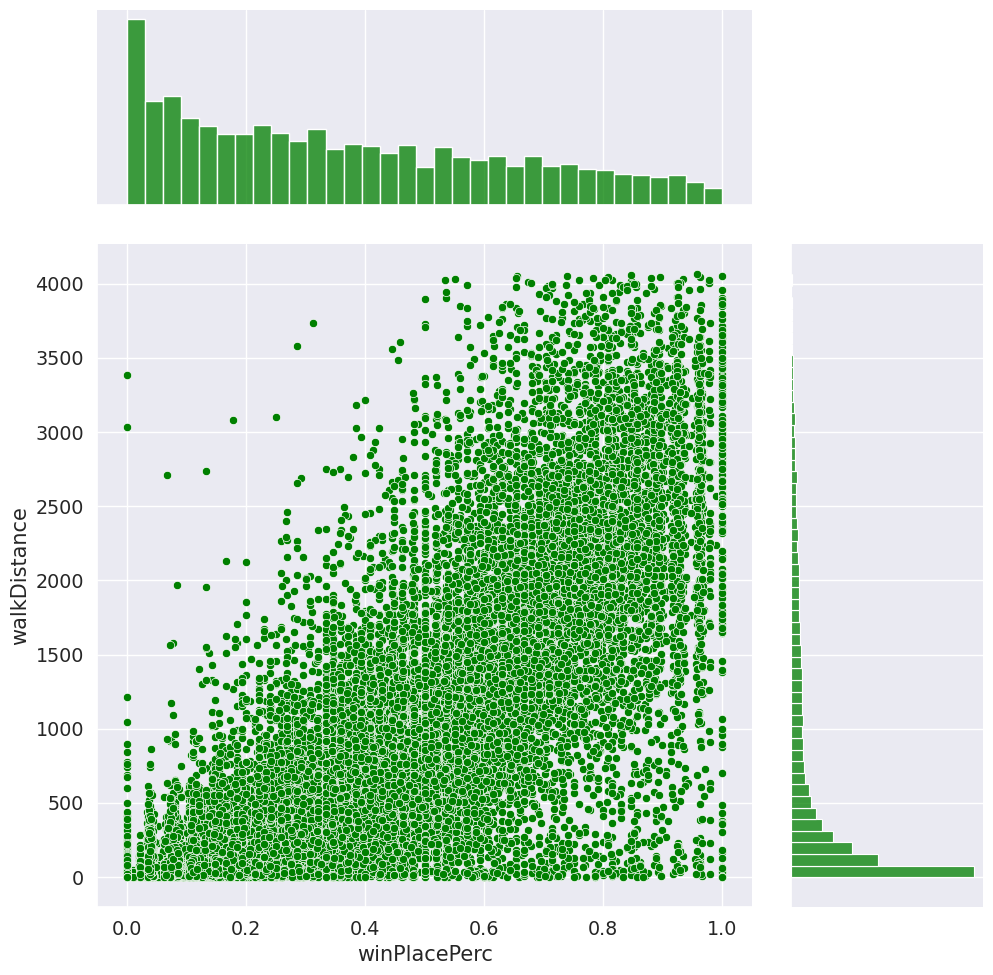

In [ ]:
sns.jointplot(x="winPlacePerc" ,y="walkDistance" ,data=data, height=10, ratio=3 , color="Green")
plt.show()

In [ ]:
print("An average person drives for {:.1f}m, 99% of people have drived {}m or less, while THE RIDER rode for {}m.".format(data['rideDistance'].mean(),data['rideDistance'].quantile(0.99),data['rideDistance'].max()))

An average person drives for 481.6m, 99% of people have drived 6532.950000000001m or less, while THE RIDER rode for 17570.0m.


<ipython-input-31-1d635ea6dbc7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rideDistance'])


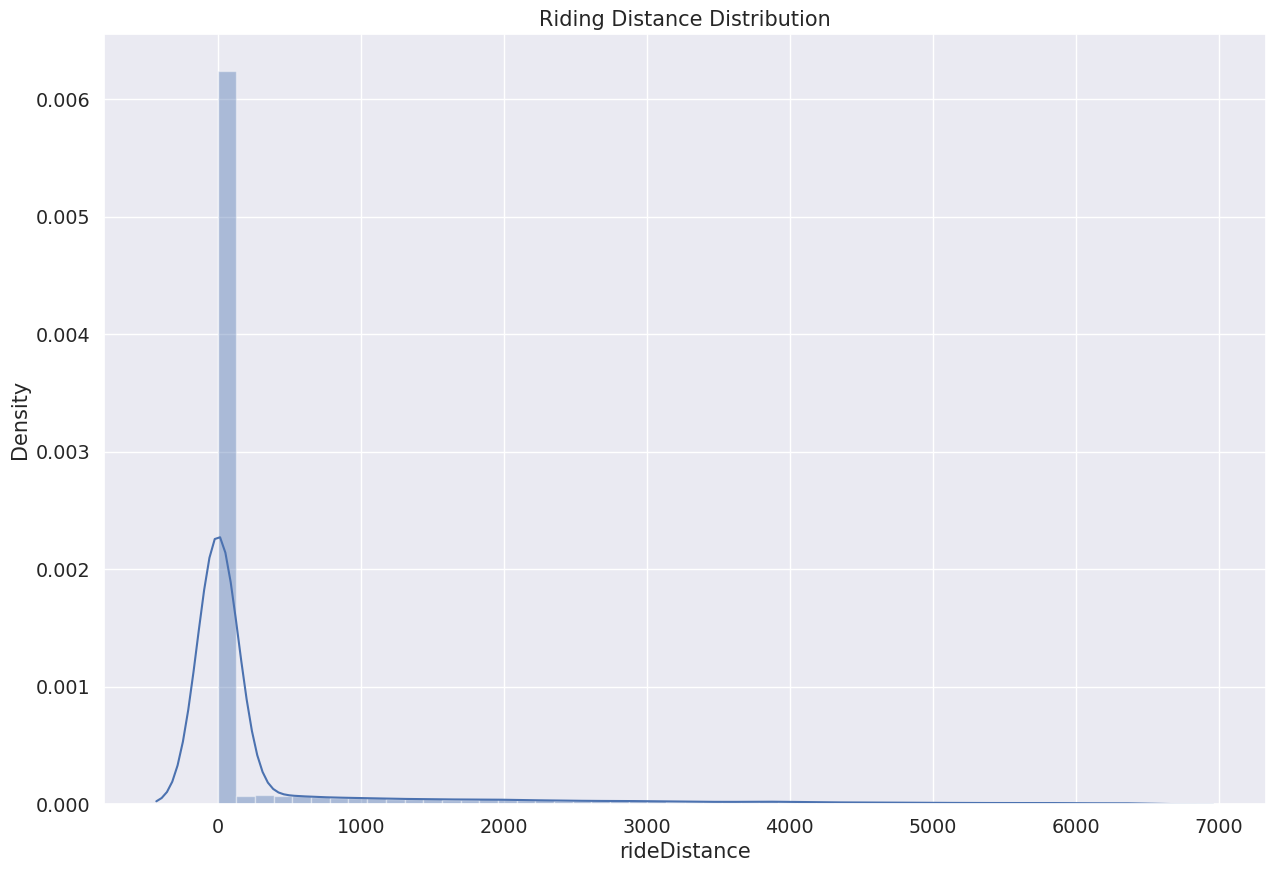

In [ ]:
data = data.copy()

data = data[data['rideDistance'] < data['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Riding Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [ ]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they like trekking more than riding.".format(len(data['rideDistance'] == 0), 100*len(data[data['rideDistance'] == 0])/len(data)))  # Moved closing parenthesis to include both values in the format function

27626 players (80.4279%) drived for 0 meters. This means that they like trekking more than riding.


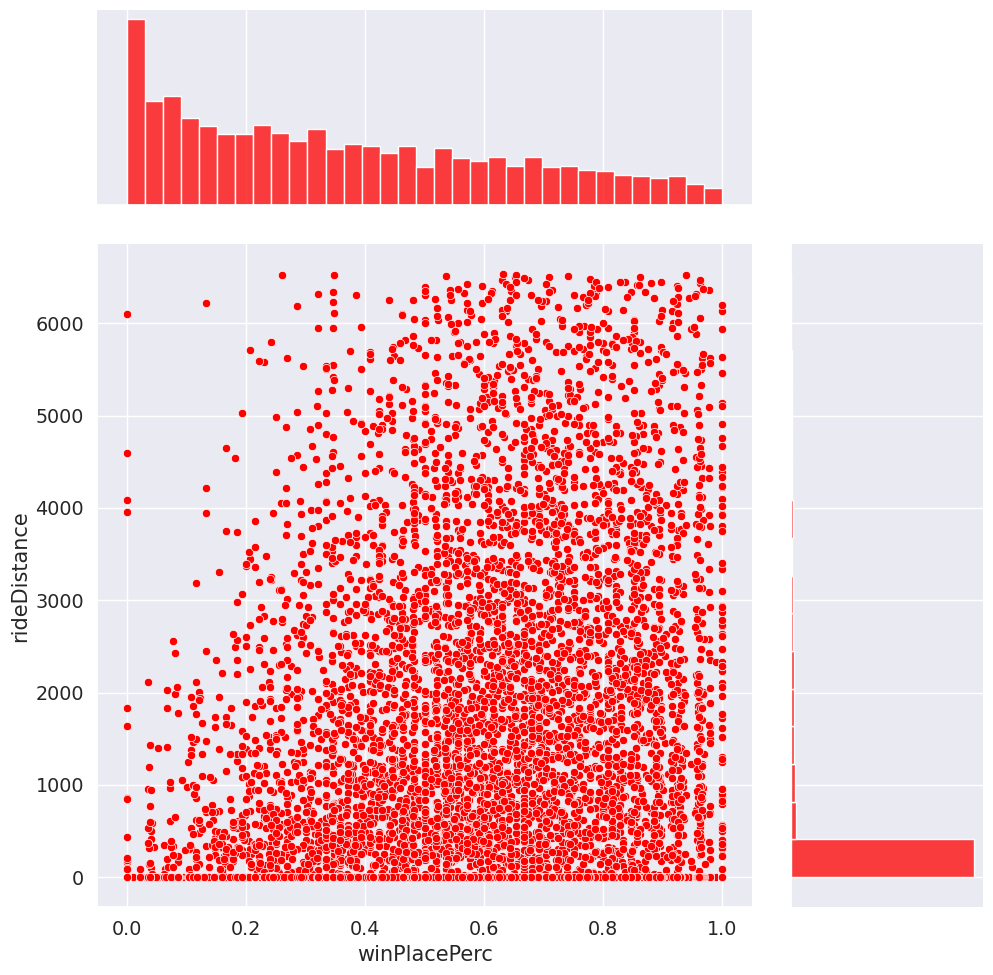

In [ ]:
sns.jointplot(x="winPlacePerc" ,y="rideDistance" ,data=data, height=10, ratio=3 , color="red")
plt.show()


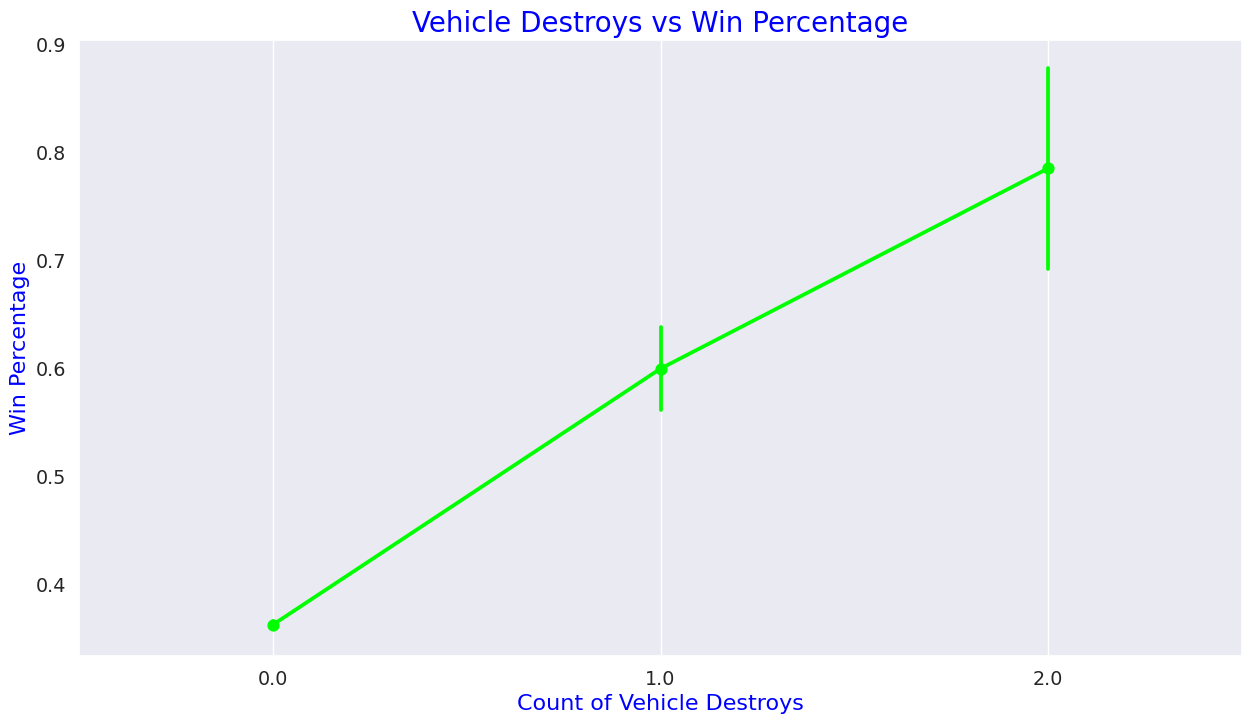

In [ ]:
f, ax1 = plt.subplots(figsize=(15, 8))
sns.pointplot(x='vehicleDestroys', y='winPlacePerc', data=data, color='lime')
plt.xlabel('Count of Vehicle Destroys', fontsize=16, color='blue')
plt.ylabel('Win Percentage', fontsize=16, color='blue')
plt.title('Vehicle Destroys vs Win Percentage', fontsize=20, color='blue')
plt.grid()
plt.show()



In [ ]:
print("In the game on an average a person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(data['heals'].mean(), data['heals'].quantile(0.99), data['heals'].max()))
print("In the game on an average a person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(data['boosts'].mean(), data['heals'].quantile(0.99), data['boosts'].max()))

In the game on an average a person uses 0.7 heal items, 99% of people use 9.0 or less, while the doctor used 47.0.
In the game on an average a person uses 0.5 boost items, 99% of people use 9.0 or less, while the doctor used 10.0.


In [ ]:
## HEALING & BOOSTING

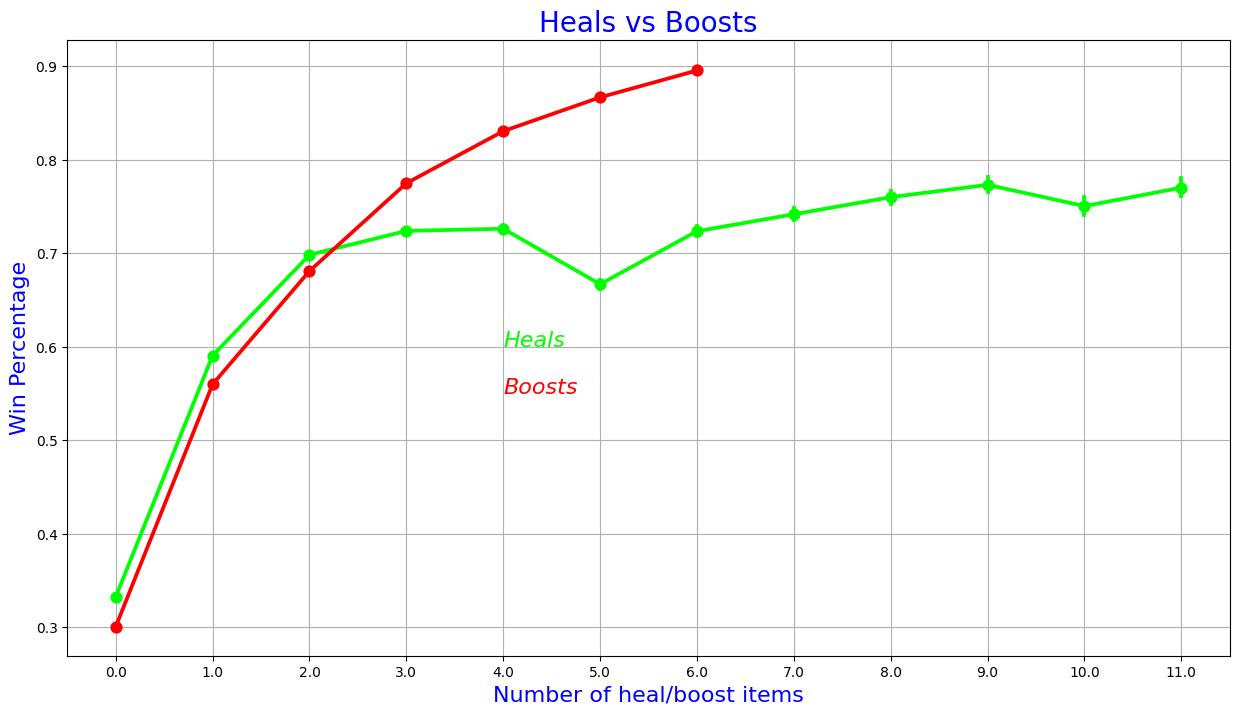

In [ ]:
data = data.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f, ax1 = plt.subplots(figsize=(15, 8))
sns.pointplot(x='heals', y='winPlacePerc', data=data, color='lime')
sns.pointplot(x='boosts', y='winPlacePerc', data=data, color='red')
plt.text(4, 0.6, 'Heals', color='lime', fontsize=16, style='italic')
plt.text(4, 0.55, 'Boosts', color='red', fontsize=16, style='italic')

plt.xlabel('Number of heal/boost items', fontsize=16, color='blue')
plt.ylabel('Win Percentage', fontsize=16, color='blue')
plt.title('Heals vs Boosts', fontsize=20, color='blue')
plt.grid()
plt.show()


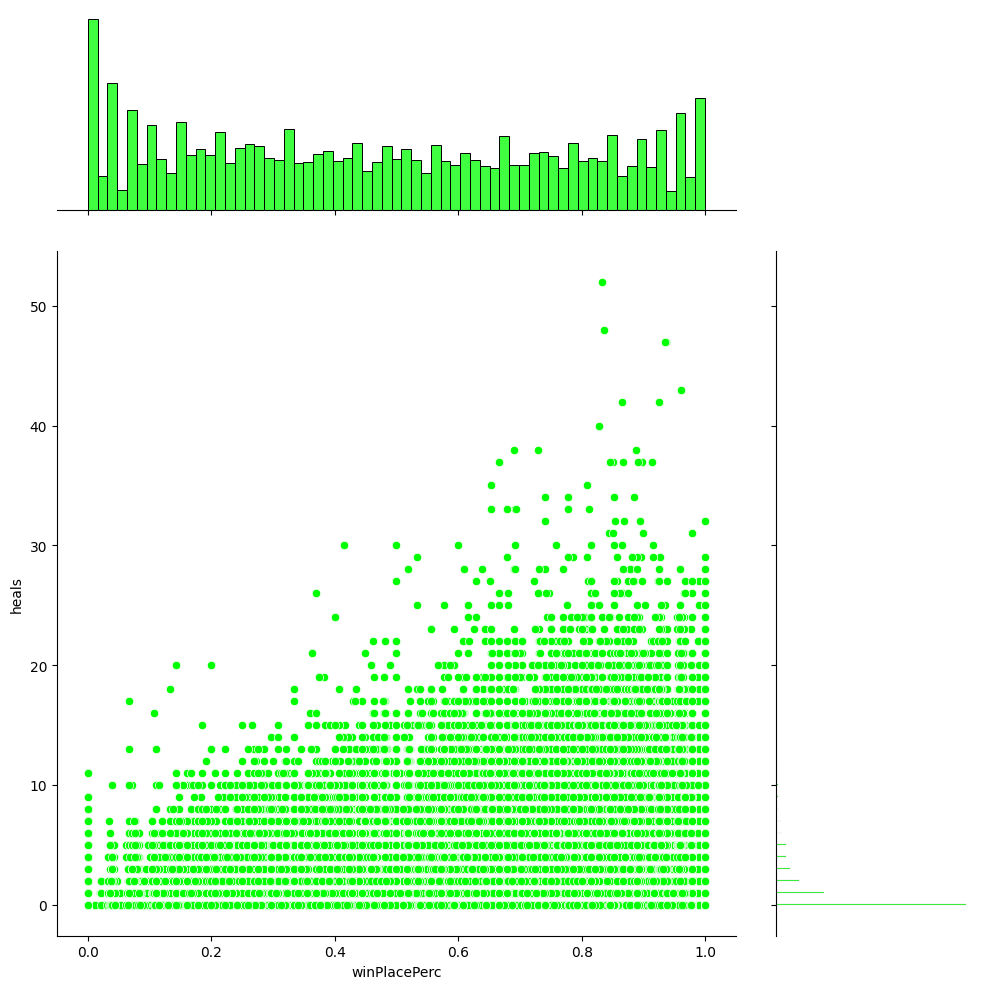

In [ ]:
sns.jointplot(x="winPlacePerc" ,y="heals" ,data=data, height=10, ratio=3 , color="lime")
plt.show()

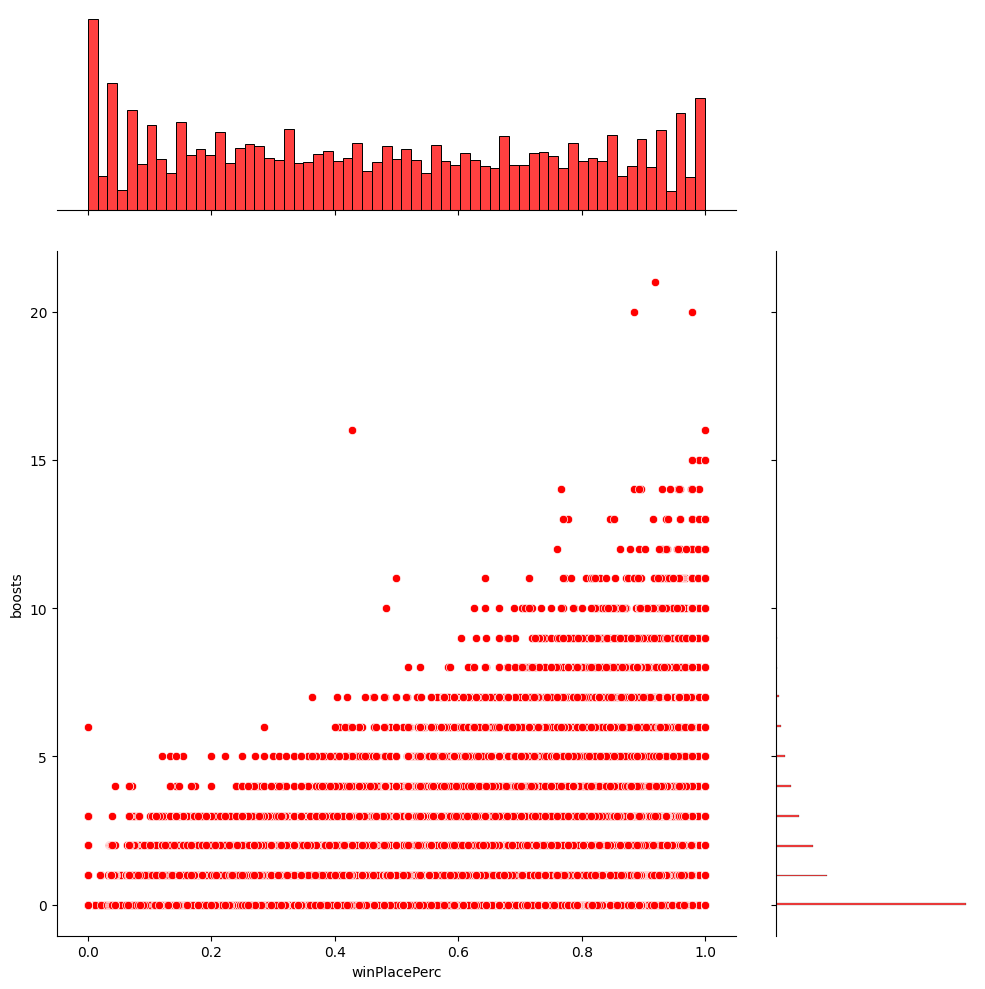

In [ ]:
sns.jointplot(x="winPlacePerc" ,y="boosts" ,data=data, height=10, ratio=3 , color="red")
plt.show()

In [ ]:
# Assuming 'gameMode' is a column that indicates whether a game is 'solo', 'duo', or 'squad'
solos = data[data['matchType'] == 'solo']
duos = data[data['matchType'] == 'duo']
squads = data[data['matchType'] == 'squad']

total_games = len(data)
solo_count = len(solos)
duo_count = len(duos)
squad_count = len(squads)

print("{} ({:.2f}%) of games are solo, {} ({:.2f}%) are duo, and {} ({:.2f}%) are squad games.".format(
    solo_count,
    100 * solo_count / total_games,
    duo_count,
    100 * duo_count / total_games,
    squad_count,
    100 * squad_count / total_games
))


6640 (4.09%) of games are solo, 11080 (6.83%) are duo, and 22772 (14.04%) are squad games.


Feature Engineering

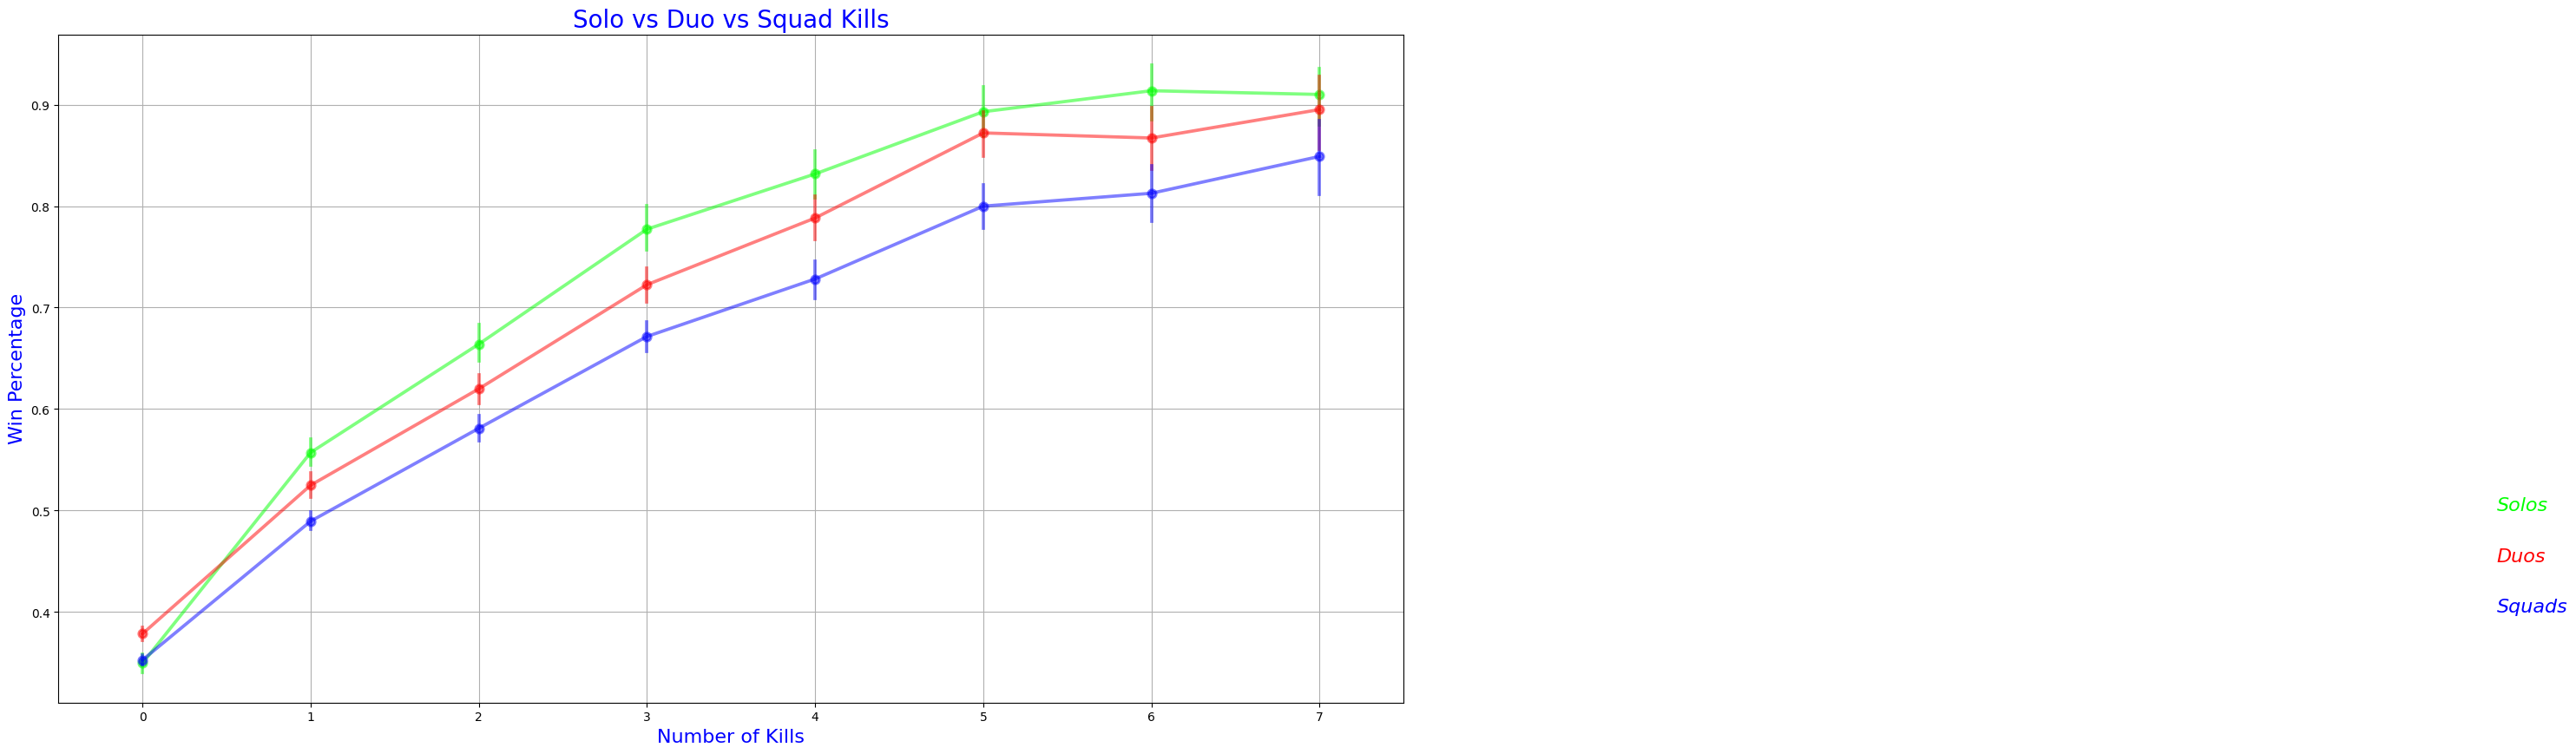

In [ ]:
fig, ax1 = plt.subplots(figsize = (20,10))

sns.pointplot(x='kills' , y='winPlacePerc',data=solos,color='lime',alpha=0.5)
sns.pointplot(x='kills' , y='winPlacePerc',data=duos,color='red',alpha=0.5)
sns.pointplot(x='kills' , y='winPlacePerc',data=squads,color='blue',alpha=0.5)

plt.text(14,0.5, 'Solos', color='lime',fontsize =16,style ='italic')
plt.text(14,0.45, 'Duos', color='red',fontsize =16,style ='italic')
plt.text(14,0.4, 'Squads', color='blue',fontsize =16,style ='italic')

plt.xlabel('Number of Kills',fontsize =16,color='blue')
plt.ylabel('Win Percentage', fontsize =16,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize =20,color='blue')

plt.grid()
plt.show()

In [ ]:
x = data.drop(['winPlacePerc'], axis = 1)
y = data['winPlacePerc']

In [ ]:
features = x.columns

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x=pd.DataFrame(x,columns=['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playerjoined', 'totaldistance', 'headshot_rate', 'killsNorm', 'damageDealtNorm', 'maxPlaceNorm',
       'matchDurationNorm', 'traveldistance', 'healsnboosts', 'assist'])

In [ ]:
x

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playerjoined,totaldistance,killwithoutmoving,headshot_rate
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0.0,0.0,244.80,1.0,1466.0,5,244.8000,False,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,11.04,0.0,0.0,1434.00,5.0,0.0,5,1445.0445,False,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,0.0,0.0,161.80,2.0,0.0,3,161.8000,False,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,0.0,0.0,202.70,3.0,0.0,6,202.7000,False,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.00,0.0,0.0,49.75,2.0,0.0,5,49.7500,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134317,b1539c4a966156,4c53d1bf08f642,ad7ddd3a5df5ed,0,0,21.29,0,0,0,60,...,0.00,0.0,0.0,1724.00,5.0,0.0,7,2436.8000,False,0.0
134318,432d292d5340ce,c6ce96c99c2df3,e36de3490946e7,0,0,0.00,0,0,0,94,...,0.00,0.0,0.0,0.00,0.0,0.0,5,0.0000,False,0.0
134319,52c4c0c4cfee45,eb495ff45b3c6b,415b826f7a0f91,2,0,447.30,2,0,0,5,...,22.01,0.0,0.0,2881.00,3.0,1495.0,4,2903.0100,False,0.0
134320,293e770acc4d58,82c0863e8aa175,f55395488673d3,1,3,80.32,0,0,1,18,...,0.00,0.0,0.0,2909.00,3.0,1533.0,5,4022.0000,False,0.0


In [ ]:
y

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
134317,0.6071
134318,0.0000
134319,0.8889
134320,1.0000


DATA SPILITTNG

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)


In [ ]:
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:         DBNOs  headshotKills  killPlace  killPoints  killStreaks  longestKill  \
196484    0.0            0.0       37.0         0.0          0.0         0.00   
169691    0.0            0.0       92.0         0.0          0.0         0.00   
189712    0.0            0.0       26.0      1202.0          1.0        47.53   
293359    0.0            0.0       84.0      1000.0          0.0         0.00   
149313    0.0            0.0       79.0      1204.0          0.0         0.00   
...       ...            ...        ...         ...          ...          ...   
183596    0.0            3.0        3.0         0.0          1.0        75.82   
32856     0.0            0.0       26.0      1050.0          1.0        76.38   
226201    0.0            1.0       13.0      1000.0          2.0         9.49   
293898    0.0            0.0       92.0         0.0          0.0         0.00   
38169     0.0            0.0       63.0         0.0          0.0         0.00   

        matchType 

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(93797, 32) (93797,)
(40199, 32) (40199,)


In [ ]:
X_train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,playerjoined,totaldistance,killwithoutmoving,headshot_rate
111363,bc77b85a553ff3,5b264ec2c4d5d1,0c604c9981d022,0,3,267.10,0,0,5,16,...,0.0,0.0,0.0,1082.00,3.0,0.0,5,6707.00,False,0.000000
90008,3be30b6e42cbd5,261910549e76c1,603858de62eb86,0,0,28.38,0,0,1,48,...,0.0,0.0,0.0,1889.00,3.0,1535.0,3,1889.00,False,0.000000
132361,e4caffb90e705d,9916869d7ea8b3,e6e23fccb398a3,0,0,43.00,0,0,0,93,...,0.0,0.0,0.0,18.38,1.0,0.0,3,18.38,False,0.000000
106751,e3d42cfc50fe23,0f084d124cb908,065a53b1b3f64c,0,0,19.30,0,0,0,73,...,0.0,0.0,0.0,357.10,2.0,1534.0,3,357.10,False,0.000000
32933,fe00a4c5e9ce89,c0b3e44fc606a0,c9b9aef9f5ee9a,0,4,88.73,1,0,8,23,...,0.0,0.0,0.0,2573.00,4.0,0.0,4,4818.00,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124606,ac5acf632c2171,2fe1e3b72bbcb6,16b009d7481742,0,2,166.90,0,0,5,41,...,0.0,0.0,0.0,1391.00,5.0,1509.0,5,6294.00,False,0.000000
32026,49ceb39412e36a,24ee31021fecf4,984b9f597b3ecf,0,1,30.72,0,0,8,56,...,0.0,0.0,0.0,2478.00,3.0,1500.0,2,4532.00,False,0.000000
23819,a909a80a14fe88,79f78a74778062,086900c21b1640,2,0,115.50,0,0,0,30,...,0.0,0.0,0.0,1880.00,4.0,0.0,10,6180.00,False,0.000000
37211,cf2b1743b3f2f1,8bf7acbb9cf931,7d998ea2e8bcae,1,2,450.50,3,1,0,8,...,0.0,0.0,0.0,1158.00,3.0,1466.0,5,1158.00,False,0.333333


In [ ]:
y_train

,winPlacePerc
111363,0.7174
90008,0.7143
132361,0.0316
106751,0.3125
32933,0.8571
...,...
124606,0.8333
32026,0.6786
23819,0.6296
37211,0.7447


INTRODUCTION

**In this report, we present our findings on building a machine learning model to predict the winner of PUBG (PlayerUnknown's Battlegrounds) matches. The objective of this project was to develop a model that  predicts the winner based on various in-game features.

Dataset Description:

**The dataset used for this project consists of various in-game features such as headshot kill, kill place, number of weapons acquired, etc., collected from PUBG matches. The dataset contains both numerical and categorical features, providing a diverse set of information for training the prediction model.

Challenges Faced:

*Feature Engineering: The  dataset contained numerous features, or irrelevant for prediction purposes. Feature engineering was crucial to select relevant features and create new informative features. We performed feature selection techniques such as correlation analysis.

Conclusion

Based on our experimentation and evaluation, we found that a unique id and a group id which is used  if they are playing in duos or squads and then again you id for every matches you can see  295119 unique id counts and the   274501 groups that plays pubg.you can see the heatmapcorreletion basically cartain attribute and outcime of varaible so one said i have the winning placement percentile and the second said bottom said kills kill streak and longest kill  all have attributes  have correlation of 0.4 while kill point match duration number of  groups and rank points contributes to nothing probability of winning, boosts contributes more than no of kills boosts is at 0.6 your weaponsacquired ia at 0.6 and walkkdistance is  at 0.8.  